# MAANG Stock MArket Analysis  - Time Series Analysis
Dt: 8th Oct 2023

#### Purpose of the Project
* Apply basic understanding of time series analysis.
* Build model for Future Prediction using Basic tensorflow models
* Build model for Portfolio Management using Sharpe ratio
* Learn new algorithm or technique for doing the above
* Get confidence for working on financial data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from  matplotlib import pyplot
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price/NETFLIX_weekly.csv
/kaggle/input/netflix-stock-price/META_weekly.csv
/kaggle/input/netflix-stock-price/APPLE_monthly.csv
/kaggle/input/netflix-stock-price/GOOGLE_daily.csv
/kaggle/input/netflix-stock-price/NETFLIX_monthly.csv
/kaggle/input/netflix-stock-price/AMAZON_daily.csv
/kaggle/input/netflix-stock-price/APPLE_weekly.csv
/kaggle/input/netflix-stock-price/META_monthly.csv
/kaggle/input/netflix-stock-price/AMAZON_monthly.csv
/kaggle/input/netflix-stock-price/GOOGLE_monthly.csv
/kaggle/input/netflix-stock-price/GOOGLE_weekly.csv
/kaggle/input/netflix-stock-price/APPLE_daily.csv
/kaggle/input/netflix-stock-price/META_daily.csv
/kaggle/input/netflix-stock-price/AMAZON_weekly.csv
/kaggle/input/netflix-stock-price/NETFLIX_daily.csv


In [2]:
amz = pd.read_csv('/kaggle/input/netflix-stock-price/AMAZON_daily.csv')
amz[:12]

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000


In [3]:
amz.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Figure size 3000x600 with 0 Axes>

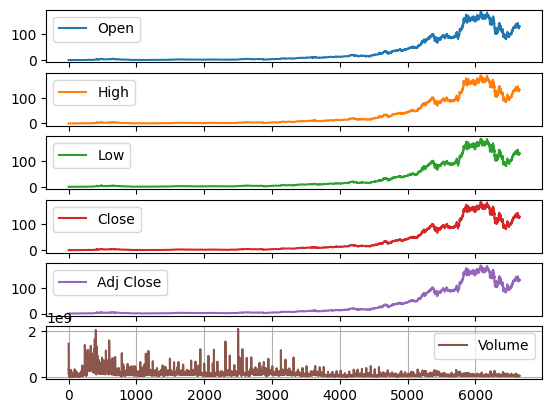

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))

# Plot the time series data
amz.plot(subplots = True)
# Overlay a grid on the graph
plt.grid(True)

# Draw the graph on screen
plt.show()

Lets just focus on Closing data

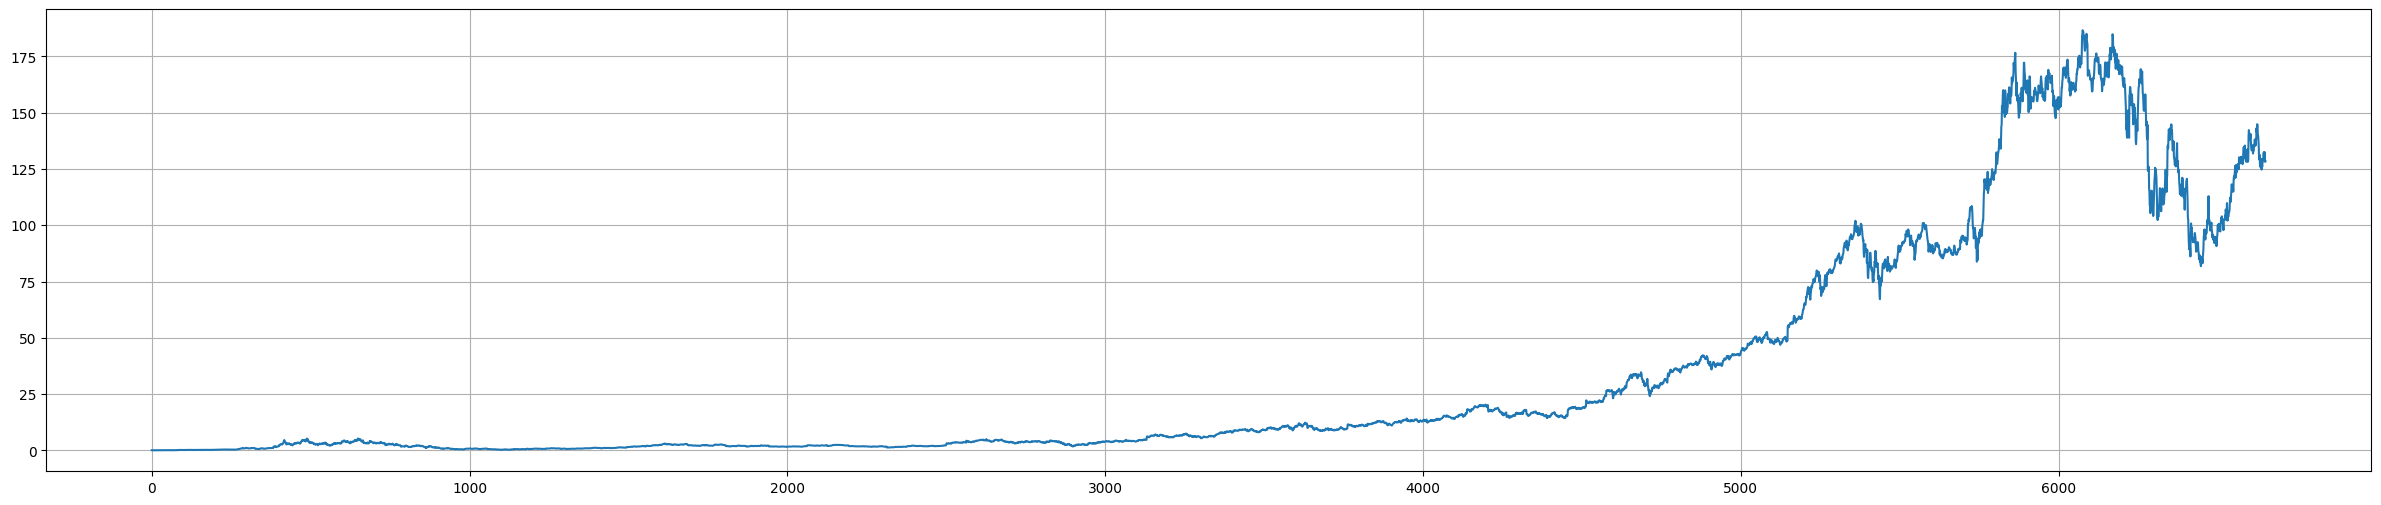

In [5]:
plt.figure(figsize=(30, 6))
plt.plot( amz.Close)
plt.grid(True)
plt.show()

Lets use 30 day 60 day 120 day moving average and take last 1500 entries for testing purpose.

In [6]:
train_size = 5650
total_size = 6560
avg_30 = amz.Close[:train_size].rolling(window = 30).mean()
avg_60 = amz.Close[:train_size].rolling(window = 60).mean()
avg_120 = amz.Close[:train_size].rolling(window = 120).mean()

Lets first print for first 1000 entries.

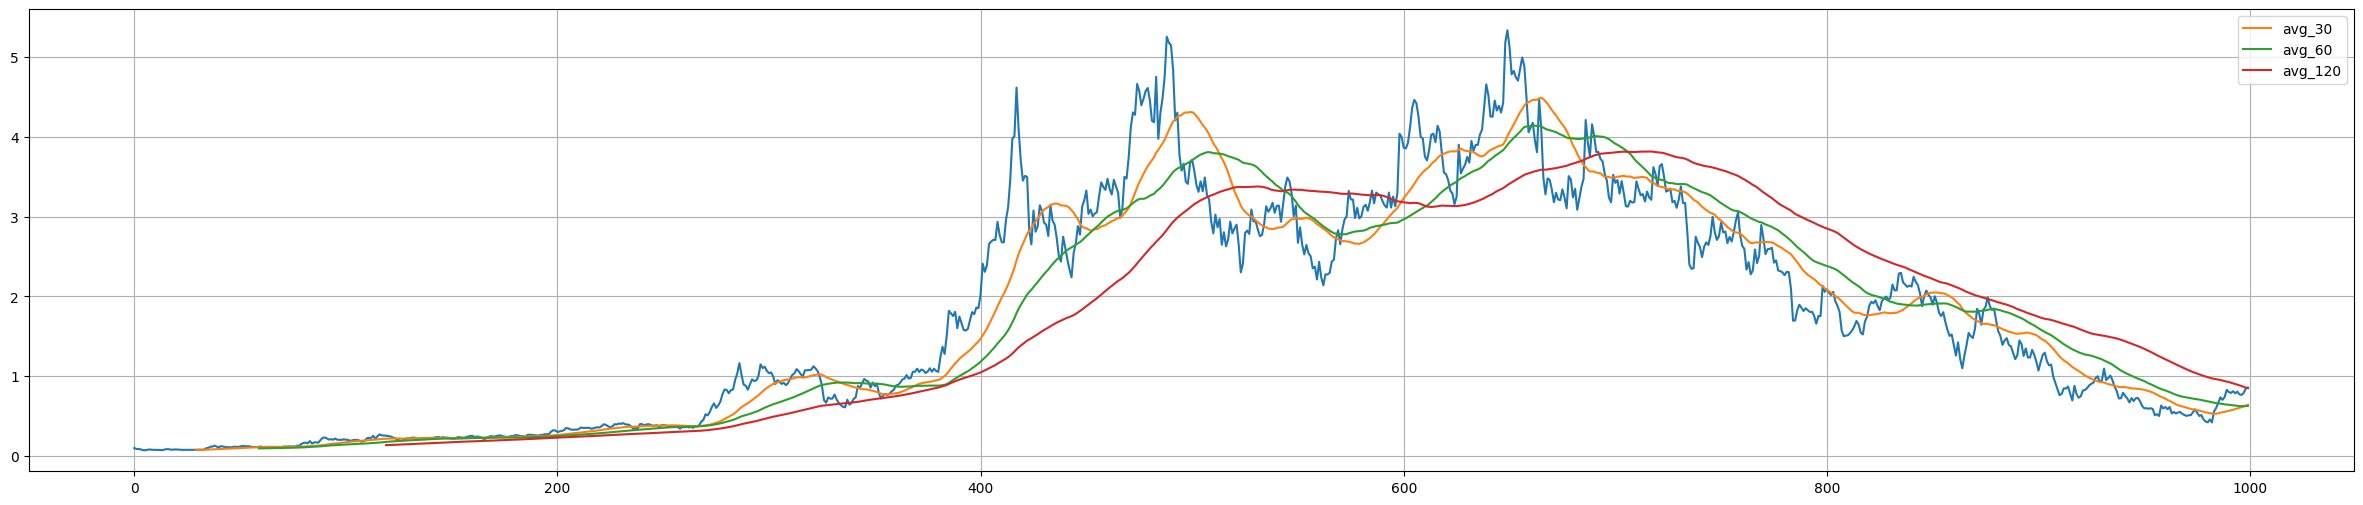

In [7]:
plt.figure(figsize=(30, 6))
plt.plot( amz.Close[:1000])
plt.plot(avg_30[:1000], label  = "avg_30")
plt.plot(avg_60[:1000], label  = "avg_60")
plt.plot(avg_120[:1000], label  = "avg_120")
plt.legend()
plt.grid(True)
plt.show()

Lets show for all training entries.

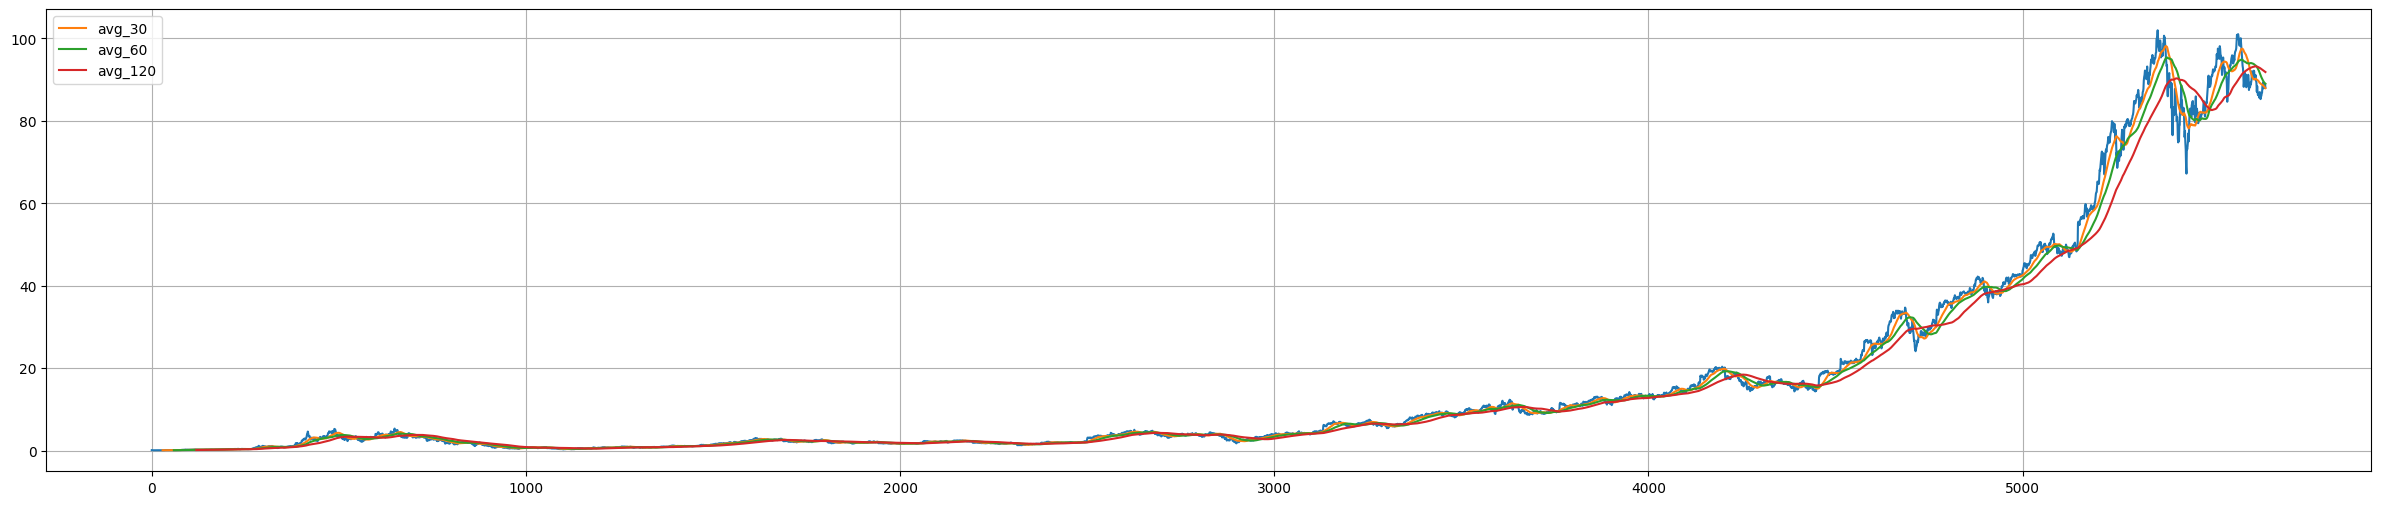

In [8]:
plt.figure(figsize=(30, 6))
plt.plot( amz.Close[:train_size])
plt.plot(avg_30, label  = "avg_30")
plt.plot(avg_60, label  = "avg_60")
plt.plot(avg_120, label  = "avg_120")
plt.legend()
plt.grid(True)
plt.show()

Now lets use this 3 model for predictions and see the result

In [9]:
test_avg_30 = amz.Close[train_size-30:].rolling(window = 30).mean()[30:]
test_avg_60 = amz.Close[train_size-60:].rolling(window = 60).mean()[60:]
test_avg_120 = amz.Close[train_size-120:].rolling(window = 120).mean()[120:]

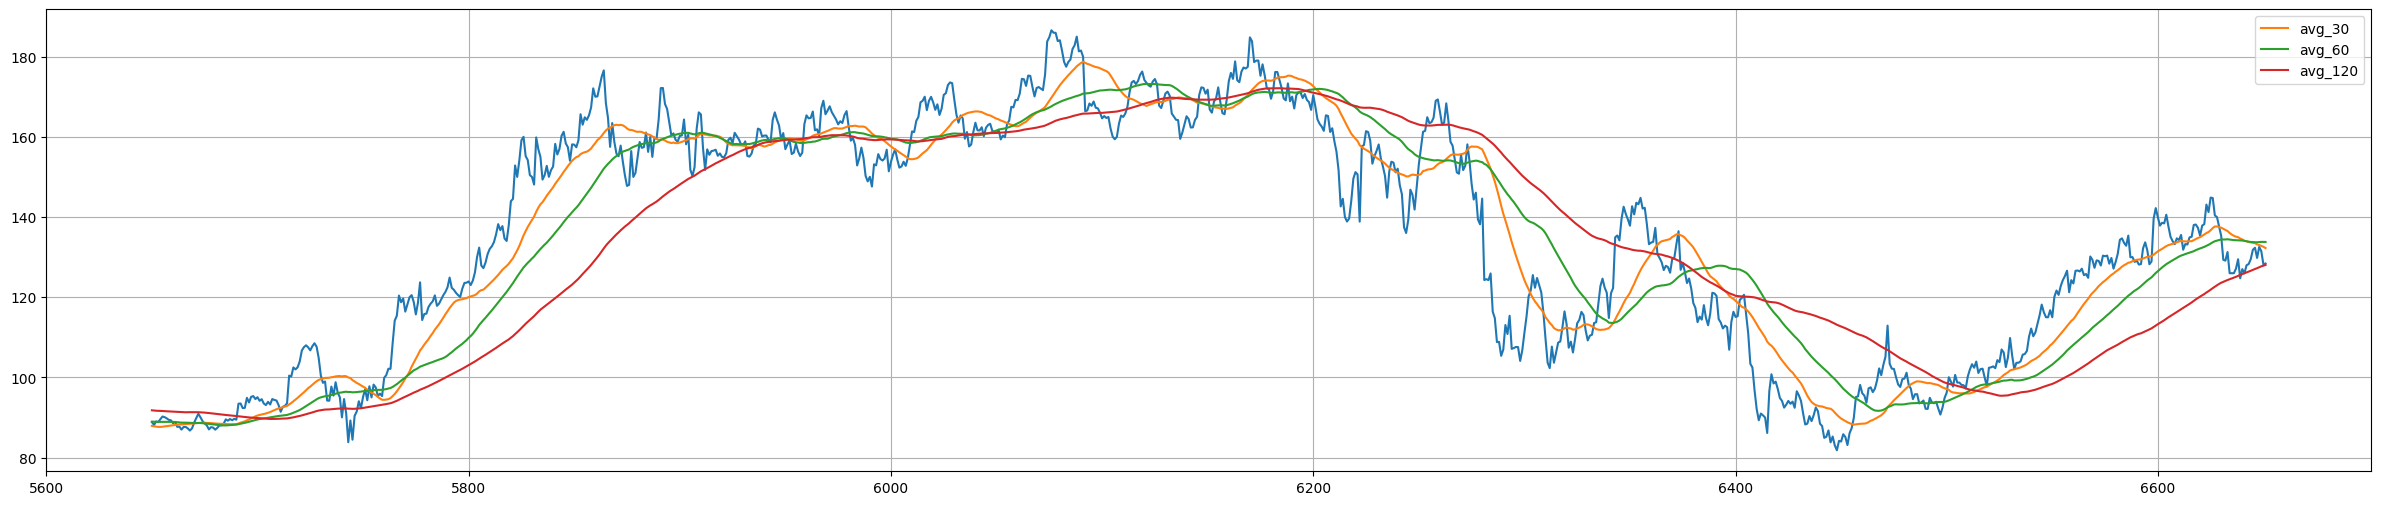

In [10]:
plt.figure(figsize=(30, 6))
plt.plot( amz.Close[train_size:])
plt.plot(test_avg_30, label  = "avg_30")
plt.plot(test_avg_60, label  = "avg_60")
plt.plot(test_avg_120, label  = "avg_120")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import tensorflow as tf

Lets see how our modle performed. 

* 1] using Mean Squared Error 
* 2] using Mean Absolute Error

In [12]:
s_error_avg_30 = tf.keras.metrics.mean_squared_error(amz.Close[train_size:], test_avg_30)
s_error_avg_60 = tf.keras.metrics.mean_squared_error(amz.Close[train_size:], test_avg_60)
s_error_avg_120 = tf.keras.metrics.mean_squared_error(amz.Close[train_size:], test_avg_120)

print(f"Squared Error for 30 SMA {s_error_avg_30} \nSquared Error for 60 SMA {s_error_avg_60} \nSquared Error for 120 SMA {s_error_avg_120} \n")

a_error_avg_30 = tf.keras.metrics.mean_absolute_error(amz.Close[train_size:], test_avg_30)
a_error_avg_60 = tf.keras.metrics.mean_absolute_error(amz.Close[train_size:], test_avg_60)
a_error_avg_120 = tf.keras.metrics.mean_absolute_error(amz.Close[train_size:], test_avg_120)

print(f"Absolute Error for 30 SMA {a_error_avg_30} \nAbsolute Error for 60 SMA {a_error_avg_60} \nAbsolute Error for 120 SMA {a_error_avg_120} \n")

Squared Error for 30 SMA 78.31955799045156 
Squared Error for 60 SMA 148.02329732702205 
Squared Error for 120 SMA 292.6887585287422 

Absolute Error for 30 SMA 6.717945803187327 
Absolute Error for 60 SMA 9.25179519133019 
Absolute Error for 120 SMA 12.813443249253854 



Now lets use the power of deep learning. But before that, lets first create the input.

In [13]:
window_size = 9
output_size = 1

train_dataset = tf.keras.utils.timeseries_dataset_from_array(amz.Close[:train_size], targets =amz.Close[window_size:], sequence_stride = 1,sequence_length = window_size )
test_dataset = tf.keras.utils.timeseries_dataset_from_array(amz.Close[train_size-window_size:], targets =amz.Close[train_size:], sequence_stride = 1,sequence_length = window_size )

In [14]:
print(train_dataset.cardinality().numpy())


for batch in test_dataset:
  inputs, targets = batch
  print(inputs, targets)
  break

45
tf.Tensor(
[[ 88.3690033   88.87149811  89.37400055 ...  88.10849762  89.03900146
   88.0664978 ]
 [ 88.87149811  89.37400055  87.87550354 ...  89.03900146  88.0664978
   88.85399628]
 [ 89.37400055  87.87550354  89.28299713 ...  88.0664978   88.85399628
   88.13549805]
 ...
 [115.38400269 120.40950012 118.75       ... 119.97250366 120.51100159
  118.80000305]
 [120.40950012 118.75       119.68049622 ... 120.51100159 118.80000305
  115.70400238]
 [118.75       119.68049622 116.40599823 ... 118.80000305 115.70400238
  118.63549805]], shape=(128, 9), dtype=float64) tf.Tensor(
[ 88.85399628  88.13549805  88.99949646  88.83300018  89.5719986
  90.23300171  90.08550262  89.78849792  89.41000366  89.29399872
  88.58249664  88.90000153  87.65550232  87.73000336  86.97450256
  87.62650299  87.63950348  87.27649689  86.73549652  87.28600311
  88.69200134  89.84700012  90.92549896  90.04000092  89.08000183
  88.4980011   88.03450012  87.02400208  87.58000183  87.47550201
  86.96050262  87.435

In [15]:
epochs = 40
lr = 0.0003
adam = tf.keras.optimizers.Adam(lr)
dnn_model = tf.keras.Sequential()
dnn_model.add(tf.keras.layers.Dense(15, activation='relu', input_dim=window_size))
dnn_model.add(tf.keras.layers.Dense(1))
dnn_model.compile(loss='mse', optimizer=adam, metrics = ['mse','mae'])
dnn_model.summary()
dnn_model.fit(train_dataset , epochs=epochs, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
45/45 - 1s - loss: 236.3135 - mse: 236.3135 - mae: 8.6599 - 1s/epoch - 33ms/step
Epoch 2/40
45/45 - 1s - loss: 162.2227 - mse: 162.2227 - mae: 6.9324 - 626ms/epoch - 14ms/step
Epoch 3/40
45/45 - 1s - loss: 116.8939 - mse: 116.8939 - mae: 5.8619 - 641ms/epoch - 14ms/step
Epoch 4/40
45/45 - 1s - loss: 82.5744 - mse: 82.5744 - mae: 4.9056 - 654ms/epoch - 15ms/step
Epoch 5/40
45/45 - 1s - loss: 56.8742 - mse: 56.8742 - mae: 4.0481 - 643ms/epoc

In [16]:
dnn_pred_value = pd.Series(dnn_model.predict(test_dataset).reshape(test_avg_30.shape)).set_axis(test_avg_30.index)
s_error_dnn = tf.keras.metrics.mean_squared_error(amz.Close[train_size:], dnn_pred_value)
a_error_dnn = tf.keras.metrics.mean_absolute_error(amz.Close[train_size:], dnn_pred_value)
print(f"Squared error for simple Dense NN is {s_error_dnn}\nAbsolute error for simple Dense NN is {a_error_dnn}")

8/8 [==============================] - 0s 16ms/step
Squared error for simple Dense NN is 40.59407043457031
Absolute error for simple Dense NN is 4.711103439331055


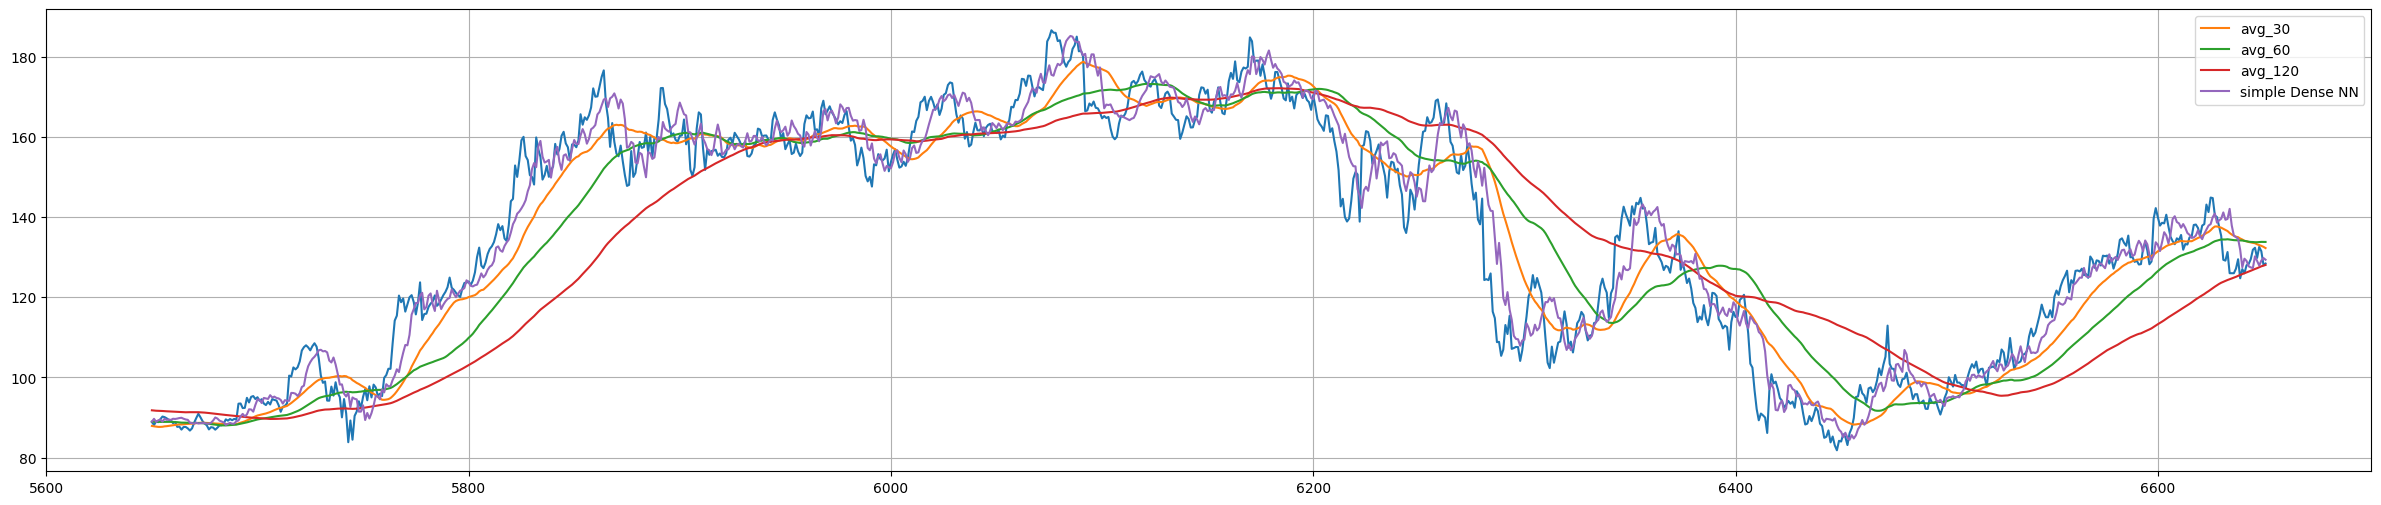

In [17]:
plt.figure(figsize=(30, 6))
plt.plot( amz.Close[train_size:])
plt.plot(test_avg_30, label  = "avg_30")
plt.plot(test_avg_60, label  = "avg_60")
plt.plot(test_avg_120, label  = "avg_120")
plt.plot(dnn_pred_value, label = "simple Dense NN")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
epochs = 40
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]))
lstm_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
lstm_model.add(tf.keras.layers.LSTM(64))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(0.0005), metrics = ['mse','mae'])
lstm_model.summary()
lstm_model.fit(train_dataset , epochs=epochs, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 9, 1)              0         
                                                                 
 lstm (LSTM)                 (None, 9, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
45/45 - 7s - loss: 12.2108 - mse: 650.0912 - mae: 12.2108 - 7s/epoch - 156ms/step
Epoch 2/40
45/45 - 2s - loss: 11.9609 - mse: 601.5239 - mae: 11.9609 - 2s/epoch - 51ms/

Some learning along the way :

Above , just now I had created a bit larger LSTM model with more units. What happened was that, mse was going down for first few epochs but then started going up and down many time. This can be the sign of high variance. or problem with learning rate as well. 

In [19]:
lstm_pred_value = pd.Series(lstm_model.predict(test_dataset).reshape(test_avg_30.shape)).set_axis(test_avg_30.index)
print(lstm_pred_value)
s_error_lstm = tf.keras.metrics.mean_squared_error(amz.Close[train_size:], lstm_pred_value)
a_error_lstm = tf.keras.metrics.mean_absolute_error(amz.Close[train_size:], lstm_pred_value)
print(f"Squared error for simple Dense NN is {s_error_lstm}\nAbsolute error for simple Dense NN is {a_error_lstm}")

8/8 [==============================] - 1s 25ms/step
5650    32.303001
5651    32.303009
5652    32.303043
5653    32.303032
5654    32.303036
          ...    
6647    32.267582
6648    32.266735
6649    32.265182
6650    32.263817
6651    32.263084
Length: 1002, dtype: float32
Squared error for simple Dense NN is 11367.5810546875
Absolute error for simple Dense NN is 102.53401184082031


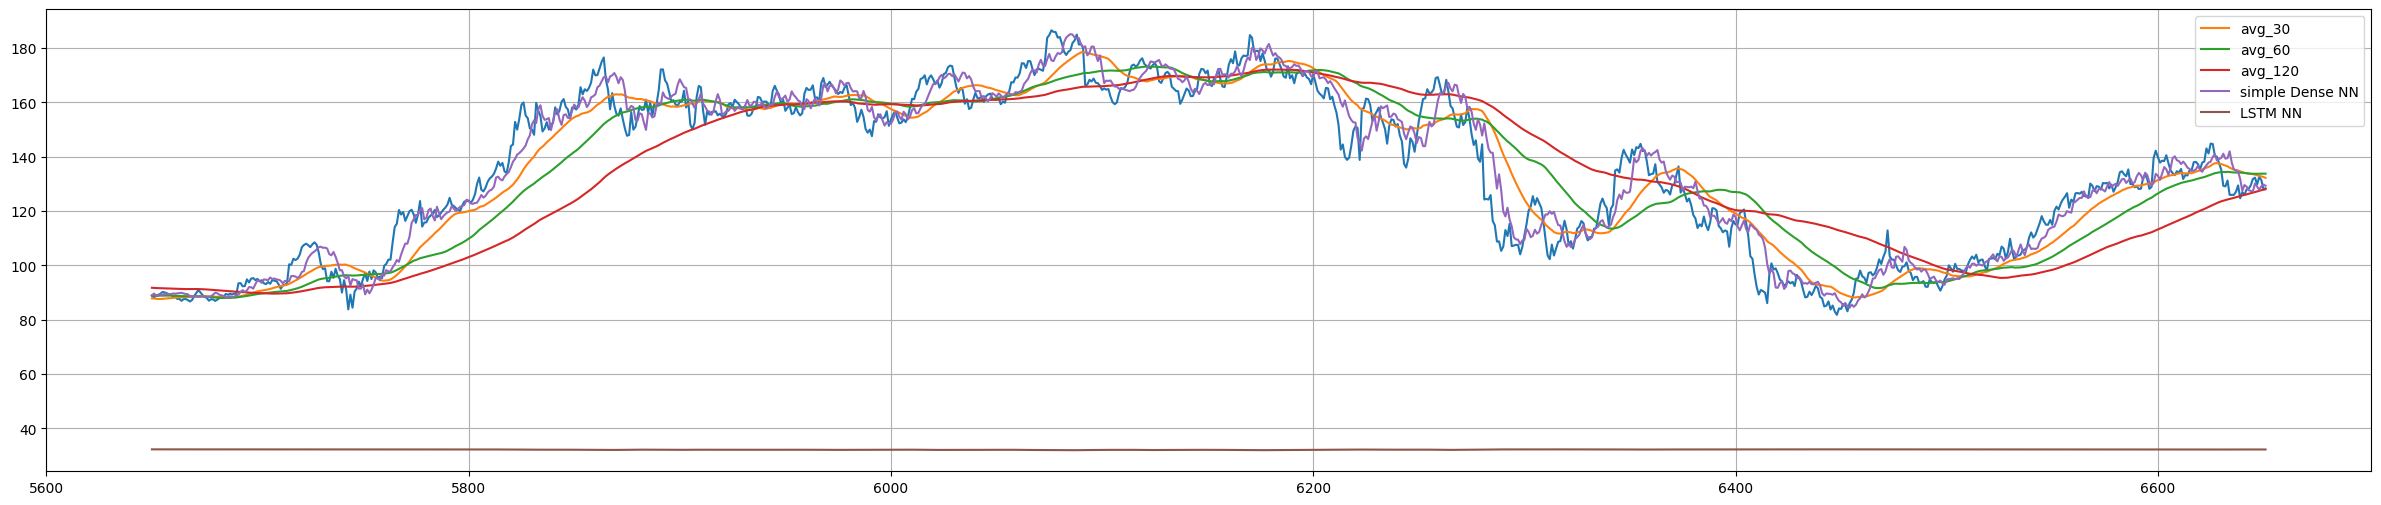

In [20]:
plt.figure(figsize=(30, 6))
plt.plot( amz.Close[train_size:])
plt.plot(test_avg_30, label  = "avg_30")
plt.plot(test_avg_60, label  = "avg_60")
plt.plot(test_avg_120, label  = "avg_120")
plt.plot(dnn_pred_value, label = "simple Dense NN")
plt.plot(lstm_pred_value, label = "LSTM NN")
plt.legend()
plt.grid(True)
plt.show()

Here LSTM has performed too bad. After looking at predictions , we can see that around 4000 entries which were in range of 0 to 20 has deeply impacted the future results as well. So lets try simplifying the model. But one thing which came out here is that not too old data is needed to be remembered by the model. Thats why either some short term memory or simple Dense model can work good here

Okay, tried attempts : 
CNN 1D, 2 LSTM layer, SimpleRNN small network -- loss value not decreasing or very minimal even in training.
Simple RNN big netwwork. -- at least loss value is decreasing in training. but testing data is ridiculous.
Big LSTM network+ Dense layers as well -- much better. good learning as loss decresed a lot and test result are also way better than all the previous attempt. S
Bigger LSTM network without Dense Layer in between -- good learning but not so good testing. 

After checking the prediction values again. It is found that entire model is just give a fixed value out put no matter what your input is. thats why in above graph , output is a straight horizontal line for LSTM model.

From experimentating with various model, it get quickly overfitted or just get underfitted. Tthis is slightly because of the data we use in training. (as mentioned above).

So I think Dense neural netowrk works well for this scenario. I will spend more time to make it better and test it on other Series data as well.

Even on observaton of Dense NN output, we can see that is just like a bit smoother lagged curve or orignal one. Kinda suspicious here about it too.